In [12]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy.io, scipy.ndimage
# import seaborn as sns
# import pandas as pd
import os
import gc

In [6]:
def plot_cell_fractions(input_dir, output_dir, runs=20):
    """
    Function that plots fractions of cells with each ecDNA type
    
    Arguments:
    input_dir (str) : path to directory containing output of C++ simulations
    output_dir (str): path to directory where output plots will be saved
    runs (int)      : number of simulation runs (default 20)
    
    Returns:
    The function returns None if run successfully. Saves plots to output_dir
    """
    # only select files from input_dir that contain cellFractions in the filename
    files = [f for f in os.listdir(input_dir) if (os.path.isfile(os.path.join(input_dir, f)) and \
                                               f.split('_')[0]=='cellFractions')]
    # sort files according to reverse date (earliest first)
    files.sort(key=lambda f: os.path.getmtime(os.path.join(input_dir,f)))
    # create output_dir if it does not exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for f in files:
        # plot data
        print('Processing file ', os.path.join(input_dir, f))
        data_fracs = np.loadtxt(os.path.join(input_dir, f),
                                dtype=float)
        data_fracs = np.reshape(data_fracs, [runs,-1,5])
        
        plt.clf()
        for d in data_fracs:
            plt.plot(d[:,1], d[:,2], '--', c='tab:blue', linewidth=0.2)
            plt.plot(d[:,1], d[:,3], '--', c='tab:orange', linewidth=0.2)
            plt.plot(d[:,1], d[:,4], '--', c='tab:green', linewidth=0.2)
        means = np.mean(data_fracs, axis=0)
        plt.plot(means[:,1], means[:,2], '-', c='tab:blue', linewidth=2, label='a')
        plt.plot(means[:,1], means[:,3], '-', c='tab:orange', linewidth=2, label='b')
        plt.plot(means[:,1], means[:,4], '-', c='tab:green', linewidth=2, label='neutral')
        plt.legend(loc=1)
        plt.xscale('log')
        
        plt.savefig(os.path.join(
            output_dir, f.split('.')[0])+'.png')
        
        # explicitly clear memory
        del data_fracs
        gc.collect()
    
    return None

Processing file  ../exps/cellFractions_1_1_0.txt
Processing file  ../exps/cellFractions_3_1_0.txt
Processing file  ../exps/cellFractions_1_1_1.txt
Processing file  ../exps/cellFractions_3_1_1.txt


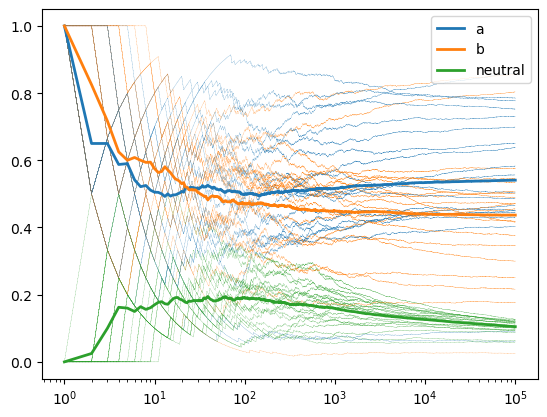

In [7]:
plot_cell_fractions('../exps/', '../exps/plots')

### Non-neutral cell population dynamics ($s=3$)

In [ ]:
# # # load data from files
# DIR = '../exps/'

# # data_a = np.loadtxt(DIR+'Summary_3_1_0_a.txt', dtype=int)
# # data_b = np.loadtxt(DIR+'Summary_3_1_0_b.txt', dtype=int)

# # # create pandas dataframe... this part is a hack that might get removed
# # # if I already save output from the C++ code in the correct format

# # ## create vector that contains the simulation run index
# # simulation_run = np.repeat(np.arange(0,data_a.shape[0],1),
# #           data_a.shape[1])

# # ## create vector containing cell number
# # cell_index = np.tile(np.arange(0, data_a.shape[1],1), data_a.shape[0])

# # ## create vector containing type name
# # types = np.repeat(np.array(['a', 'b']), data_a.flatten().size)

# # ## create dataframe
# # data = pd.DataFrame({"cell index": np.concatenate((cell_index, cell_index)),
# #                     "simulation run": np.concatenate((simulation_run, simulation_run)),
# #                      "copy number": np.concatenate((data_a.flatten(), data_b.flatten())),
# #                      "ecDNA type": types})
# # data

In [ ]:
# # plot histograms
# max_no = int(max(data_a.max(), data_b.max()))
# plt.figure(figsize=(15,5))
# plt.subplot(121)
# sns.histplot(data=data, bins=max_no, x="copy number", hue="ecDNA type", kde=True)
# plt.title('ecDNA copy numbers by type')

# # groupby simulation run and cell index and plot the histogram of total
# # ecDNA copy number
# group = data.groupby(['cell index','simulation run'])['copy number']
# plt.subplot(122)
# sns.histplot(group.sum(), bins=group.sum().max(), kde=True, color='g')
# plt.title('Total ecDNA copy number')

In [ ]:
# # sanity check: this checks that no cells are devoid of both type 'a' and
# # type 'b' ecDNA, i.e., that each cell contains either type of ecDNA

# ## cells with no copies of type 'a' ecDNA
# a_0 = data.index[(data['copy number'] == 0) & (data['ecDNA type'] == 'a')].tolist()
# ## cells with no copies of type 'b' ecDNA
# b_0 = data.index[(data['copy number'] == 0) & (data['ecDNA type'] == 'b')].tolist()

# ## check intersection between two sets is an empty set
# if not list(set(a_0) & set(b_0)): print("Intersection is empty!")

In [ ]:
# data_fracs = np.loadtxt(DIR+'cellFractions_3_1_0.txt', dtype=float)
# data_fracs = np.reshape(data_fracs, [20,-1,5])

In [ ]:
# # plot cell fractions as a function of total cell population
# plt.figure()
# for d in data_fracs:
#     plt.plot(d[:,1], d[:,2], '--', c='tab:blue', linewidth=0.2)
#     plt.plot(d[:,1], d[:,3], '--', c='tab:orange', linewidth=0.2)
#     plt.plot(d[:,1], d[:,4], '--', c='tab:green', linewidth=0.2)
# means = np.mean(data_fracs, axis=0)
# plt.plot(means[:,1], means[:,2], '-', c='tab:blue', linewidth=2, label='a')
# plt.plot(means[:,1], means[:,3], '-', c='tab:orange', linewidth=2, label='b')
# plt.plot(means[:,1], means[:,4], '-', c='tab:green', linewidth=2, label='neutral')
# plt.legend()
# plt.xscale('log')
# # plt.yscale('log')

### Neutral cell population dynamics ($s=1$)

In [ ]:
# # load data from files
# DIR = '../exps/'

# data_a = np.loadtxt(DIR+'Summary_1_1_0_a.txt', dtype=int)
# data_b = np.loadtxt(DIR+'Summary_1_1_0_b.txt', dtype=int)

# # create pandas dataframe... this part is a hack that might get removed
# # if I already save output from the C++ code in the correct format

# ## create vector that contains the simulation run index
# simulation_run = np.repeat(np.arange(0,data_a.shape[0],1),
#           data_a.shape[1])

# ## create vector containing cell number
# cell_index = np.tile(np.arange(0, data_a.shape[1],1), data_a.shape[0])

# ## create vector containing type name
# types = np.repeat(np.array(['a', 'b']), data_a.flatten().size)

# ## create dataframe
# data_n = pd.DataFrame({"cell index": np.concatenate((cell_index, cell_index)),
#                     "simulation run": np.concatenate((simulation_run, simulation_run)),
#                      "copy number": np.concatenate((data_a.flatten(), data_b.flatten())),
#                      "ecDNA type": types})
# data_n

In [ ]:
# # plot histograms
# max_no = int(max(data_a.max(), data_b.max()))
# plt.figure(figsize=(15,5))
# plt.subplot(121)
# sns.histplot(data=data_n, bins=max_no, x="copy number", hue="ecDNA type", kde=True)
# plt.title('ecDNA copy numbers by type')

# # groupby simulation run and cell index and plot the histogram of total
# # ecDNA copy number
# group_n = data_n.groupby(['cell index','simulation run'])['copy number']
# plt.subplot(122)
# sns.histplot(group_n.sum(), bins=group_n.sum().max(), kde=True, color='g')
# plt.title('Total ecDNA copy number')

In [ ]:
# # sanity check: this checks that no cells are devoid of both type 'a' and
# # type 'b' ecDNA, i.e., that each cell contains either type of ecDNA

# ## cells with no copies of type 'a' ecDNA
# a_0 = data_n.index[(data_n['copy number'] == 0) & (data_n['ecDNA type'] == 'a')].tolist()
# ## cells with no copies of type 'b' ecDNA
# b_0 = data_n.index[(data_n['copy number'] == 0) & (data_n['ecDNA type'] == 'b')].tolist()

# ## check intersection between two sets is an empty set
# if not list(set(a_0) & set(b_0)): print("Intersection is empty!")

In [ ]:
# data_fracs_n = np.loadtxt(DIR+'cellFractions_1_1_0.txt', dtype=float)
# data_fracs_n = np.reshape(data_fracs_n, [20,-1,5])

In [ ]:
# # plot cell fractions as a function of total cell population
# plt.figure()
# for d in data_fracs_n:
#     plt.plot(d[:,1], d[:,2], '-', c='tab:blue', alpha=0.1)
#     plt.plot(d[:,1], d[:,3], '-', c='tab:orange', alpha=0.1)
#     plt.plot(d[:,1], d[:,4], '-', c='tab:green', alpha=0.1)
# means_n = np.mean(data_fracs_n, axis=0)
# plt.plot(means_n[:,1], means_n[:,2], c='tab:blue', linewidth=2, label='a')
# plt.plot(means_n[:,1], means_n[:,3], '-', c='tab:orange', linewidth=2, label='b')
# plt.plot(means_n[:,1], means_n[:,4], '-', c='tab:green', linewidth=2, label='neutral')
# plt.legend()
# plt.xscale('log')
# # plt.yscale('log')

In [ ]:
# plt.figure()
# plt.plot(means_n[:,1], means_n[:,4], '-', c='k', linewidth=2, label='$s=1$')
# plt.plot(means[:,1], means[:,4], '-', c='b', linewidth=2, label='$s=3$')
# plt.xscale('log')
# plt.legend()
# plt.show()

In [ ]:
# # plot overlapping histograms

# plt.figure(figsize=(15,10))
# plt.subplot(221)
# plt.title('Type-a ecDNA copy numbers')
# sns.kdeplot(data=data.loc[data['ecDNA type']=='a'], x="copy number",
#              # bins=max_no, kde=False,
#             label='s=3')
# sns.kdeplot(data=data_n.loc[data_n['ecDNA type']=='a'], x="copy number",
#              # bins=max_no, kde=False,
#             label='s=1')
# plt.legend()

# plt.subplot(222)
# plt.title('Type-b ecDNA copy numbers')
# sns.kdeplot(data=data.loc[data['ecDNA type']=='b'], x="copy number",
#              # bins=max_no, kde=False,
#             label='s=3')
# sns.kdeplot(data=data_n.loc[data_n['ecDNA type']=='b'], x="copy number",
#              # bins=max_no, kde=False,
#              label='s=1')
# plt.legend()

# plt.subplot(223)
# plt.title('Total ecDNA copy numbers')
# sns.kdeplot(group.sum(), label='s=3')
# sns.kdeplot(group_n.sum(), label='s=1')
# plt.legend()
# plt.show()